# MVP : NY Health Inspection/Demographic/Reviews Data Project
- still need reviews/census data

# ACQUISITION

## Imports used

In [1]:
%load_ext autoreload
%autoreload 2

# Imported libraries
import acquire as a
import prepare as p
import explore as e
import os
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marc_aradillas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/marc_aradillas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Aquisition function that pulls data currently stored or requests the data from socrata

In [2]:
ny = p.final_ny()

In [3]:
ny

,camis,dba,boro,phone,cuisine_description,inspection_date,action,score,grade,latitude,longitude,full_address,violation_code,violation_description
0,41086967,IL SOLE,Manhattan,2125440406,Italian,2019-12-16T00:00:00.000,Violations cited,13,A,0.000000,0.000000,229233 DYCKMAN STREET 0,04K 10F 08A,Evidence of rats or live rats present in facil...
1,50108113,KAUSA,Manhattan,6465970651,Peruvian,2021-12-15T00:00:00.000,Violations cited,37,C,40.763687,-73.988809,745 9 AVENUE 10019,09C 04M 02B 06C 06E 06D 08A 04N,Food contact surface not properly maintained. ...
2,50073722,ANTOYA,Manhattan,2126953131,Korean,2022-11-18T00:00:00.000,No violations,0,A,40.747630,-73.986610,37 WEST 32 STREET 10001,No violation,No violation
3,50041341,ASIAN FUSION,Manhattan,2128663888,Asian/Asian Fusion,2019-11-06T00:00:00.000,Violations cited,38,C,0.000000,0.000000,2071 ADAM CLAYTON POWELL JR BOULEVARD 0,02B 04L 02G 08A 02H 06D,Hot food item not held at or above 140º F. Evi...
4,41395403,CITI FIELD STAND 137,Queens,7185958100,American,2017-06-13T00:00:00.000,Violations cited,12,A,0.000000,0.000000,000 126TH ST & ROOSEVELT AVENUE 0,02B 06E,Hot food item not held at or above 140º F. San...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197990,50018858,NOREETUH,Manhattan,6468923050,American,2023-03-03T00:00:00.000,Violations cited,2,A,40.727365,-73.985442,128 1 AVENUE 10009,10F,Non-food contact surface or equipment made of ...
197996,50105594,HIBISCUS BREW,Brooklyn,3478243537,Coffee/Tea,2023-10-10T00:00:00.000,Violations cited,2,A,40.660730,-73.960767,546 FLATBUSH AVENUE 11225,10F,Non-food contact surface or equipment made of ...
197999,50087220,LA CASA DE FRIDA,Bronx,9145486310,Mexican,2020-01-16T00:00:00.000,Violations cited,4,A,40.872869,-73.878445,307 EAST 204 STREET 10467,10F,Non-food contact surface improperly constructe...
198006,50117836,READY PENNY INN,Queens,9179756531,American,2023-04-03T00:00:00.000,Violations cited,3,A,40.748524,-73.892640,3707 73RD ST 11372,10F,Non-food contact surface or equipment made of ...


In [4]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60911 entries, 0 to 198009
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  60911 non-null  int64  
 1   dba                    60911 non-null  object 
 2   boro                   60911 non-null  object 
 3   phone                  60911 non-null  int64  
 4   cuisine_description    60911 non-null  object 
 5   inspection_date        60911 non-null  object 
 6   action                 60911 non-null  object 
 7   score                  60911 non-null  int64  
 8   grade                  60911 non-null  object 
 9   latitude               60911 non-null  float64
 10  longitude              60911 non-null  float64
 11  full_address           60911 non-null  object 
 12  violation_code         60911 non-null  object 
 13  violation_description  60911 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 7.0+ MB


## Removed features that were not useful:
- critical_flag
- grade_date
- record_date
- inspection_type
- community_board
- council_district
- census_tract
- bin
- nta

# PREPARATION

## Prepare function ran: retained zipode to match the demographic features (using as primary key for this join)

In [5]:
# Prep function
ny = p.final_ny()

In [6]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60911 entries, 0 to 60910
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  60911 non-null  int64  
 1   dba                    60911 non-null  object 
 2   boro                   60911 non-null  object 
 3   phone                  60911 non-null  int64  
 4   cuisine_description    60911 non-null  object 
 5   inspection_date        60911 non-null  object 
 6   action                 60911 non-null  object 
 7   score                  60911 non-null  int64  
 8   grade                  60911 non-null  object 
 9   latitude               60911 non-null  float64
 10  longitude              60911 non-null  float64
 11  full_address           60911 non-null  object 
 12  violation_code         60911 non-null  object 
 13  violation_description  60911 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.5+ 

## Cleaning actions:
- aggregated and combined informations
- Dropped many null values
- encoded matching scores with grades
- violations code and text descriptions corrected and matched appropriately

# ***Health Inspection Data*** EXPLORATORY DATA ANALYSIS

## Distribution of retrieved NY health inspection data

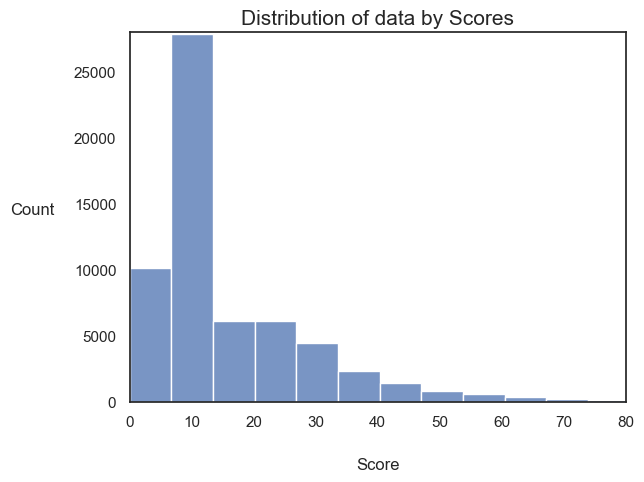

In [7]:
e.data_distribution(ny)

# Q-1. **What are the top 20 businesses in the NY Health Inspections dataset?**

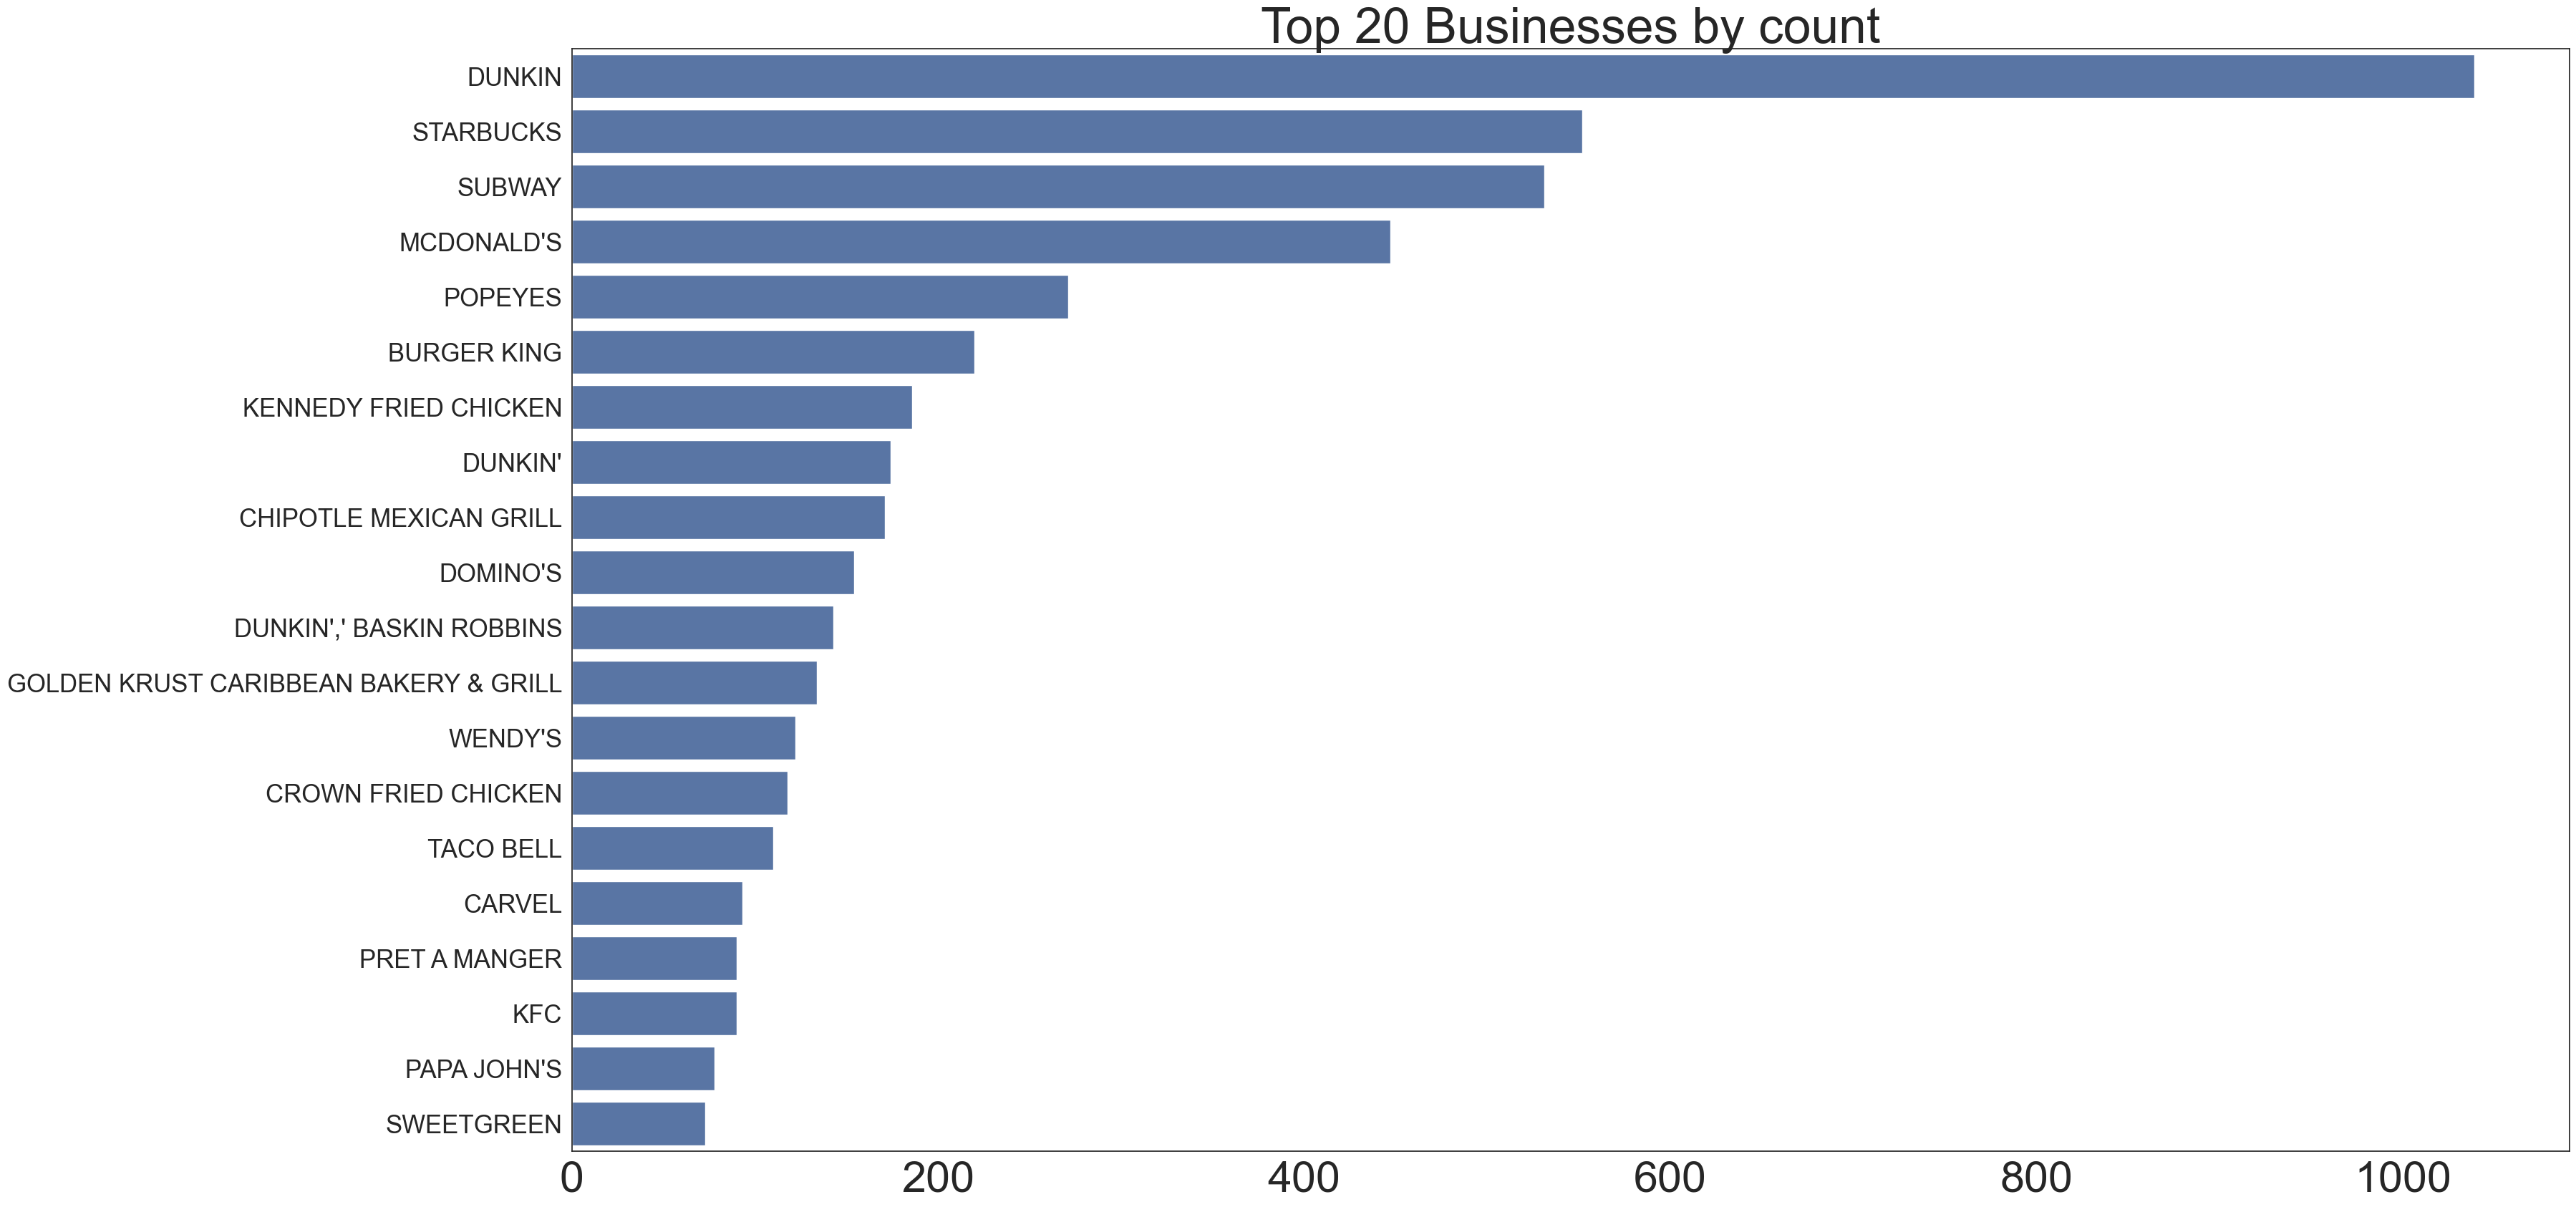

In [8]:
e.visual_1(ny)

  ## Takeaway: 
    
- **Organized by unique camis_id (unique business ids); Dunkin, Dunkin', and Dunkin'/other businesses attached or combined seems to come up the most in our top 20 listing.**

# Q-2. What were the top 20 cuisine descriptions listed on inspections?

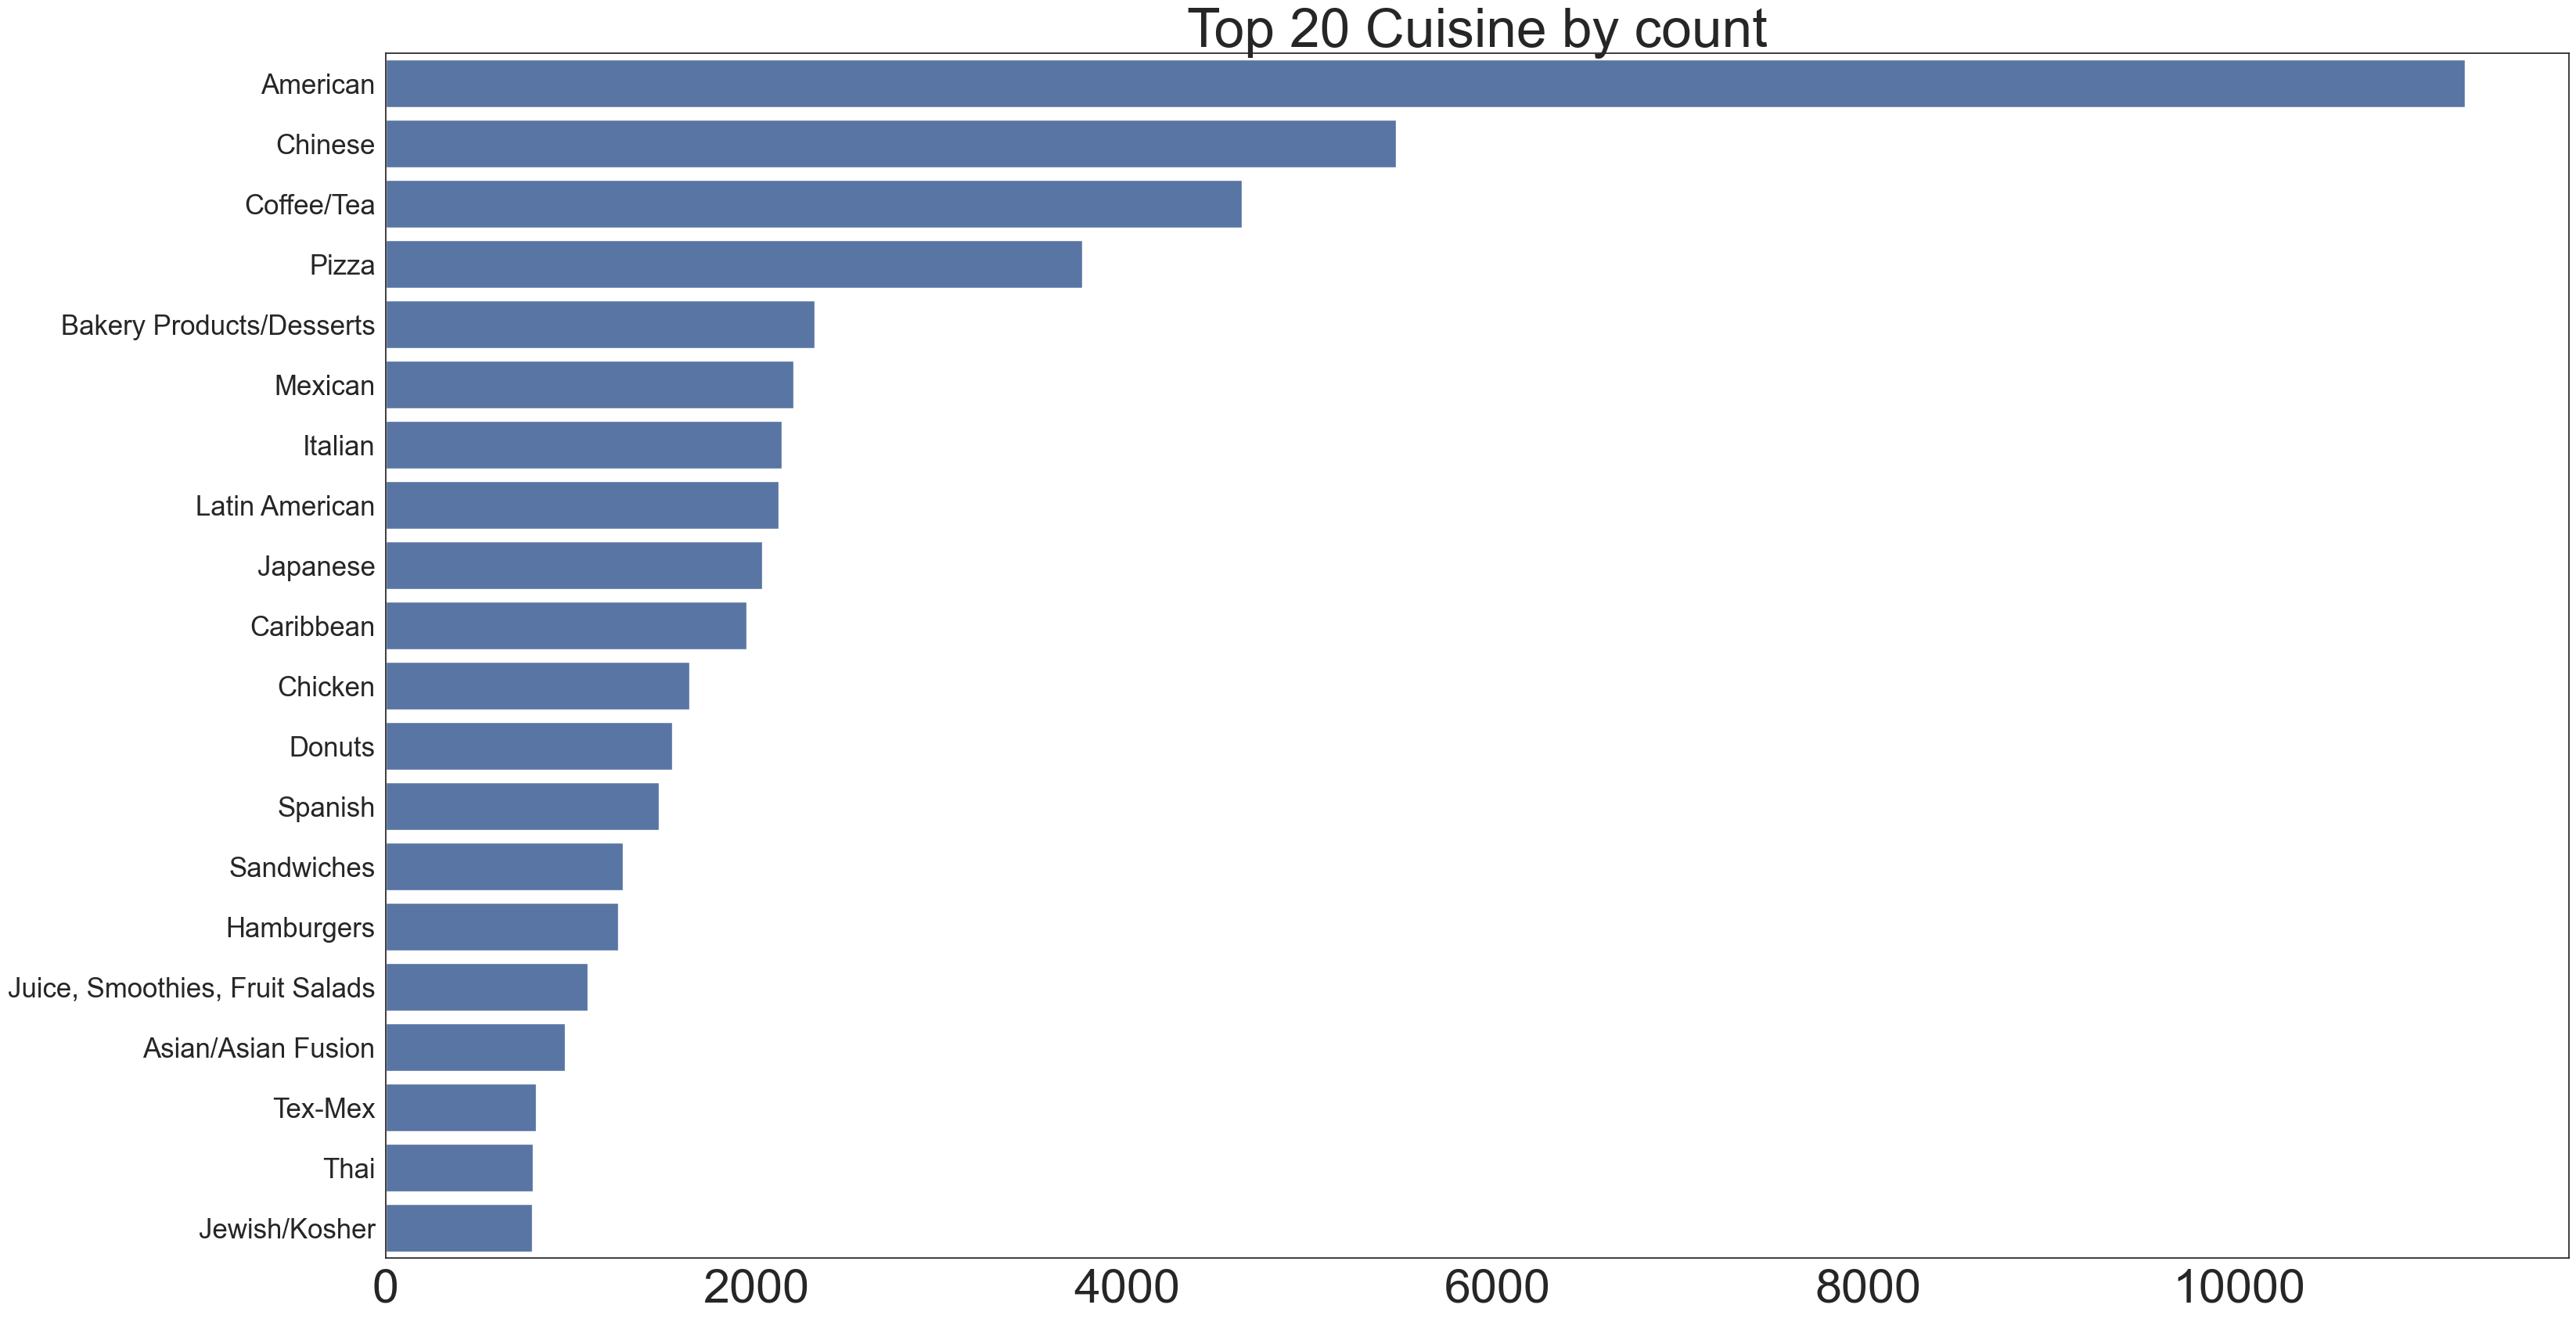

In [9]:
e.visual_2(ny)

  ## Takeaway: 
    
- **The top cuisine descriptions were annotated as American cuisine. However, it is worth noting that items such as sandwiches, hamburgers, or any single food items do not have a clear ethnic association, making this feature weak in terms of predicting grade or score outcomes.**

## Marc:

## ***After looking at the top failing scores across all boroughs and result actions taken by the health inspection we noted the biggest difference between 2 boroughs scores/outcomes decided to conduct and independent t-test to determine is there is a significant difference between the Bronx and Queens.***

# Q-3. Based on the Top 20 failing business for the Bronx and Queens, is there a significant difference between the Bronx and Queens in terms of scores received and results ending with a citation or close actions?

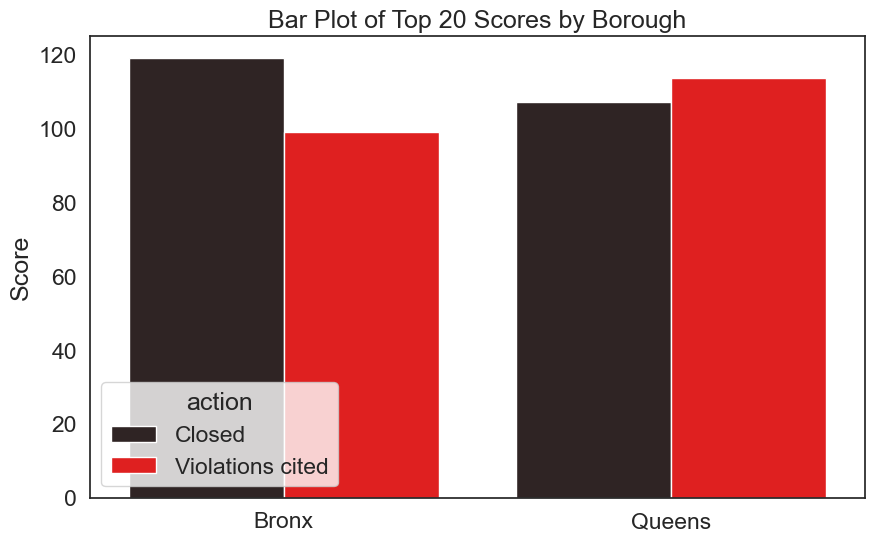



t-statistic: -1.9386185179765925

Failed to reject the null hypothesis with a P-value of 0.06000178954876174

There is no significant difference in health inspection scores between the Bronx and Queens.


In [10]:
e.visual_3(ny)

  ## Takeaway: 
    
- **At first look across five borough there seems to be a difference between the Bronx and Queens, after only comparing both boroughs we can determine there is no significant difference in health inspection scores between the Bronx and Queens**

# Q-4. Is there a correlation between health inspection scores and health inspection dates over time?

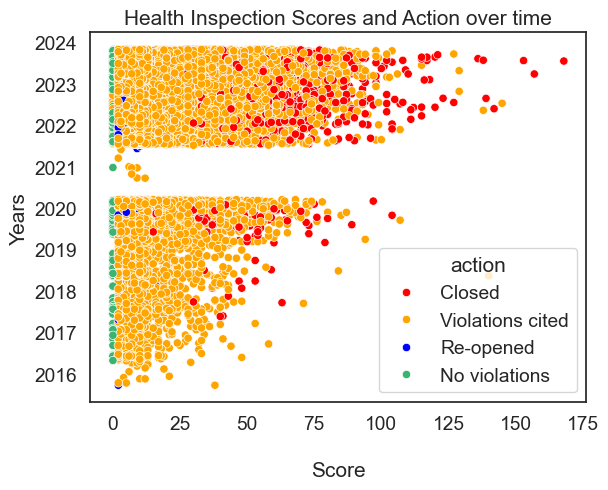



Pearson Correlation Coefficient: 0.10388309947919833

Rejected the null hypothesis with a P-value of 9.621811032018983e-146.

There is a statistically significant correlation between inspection scores and inspection dates.


In [11]:
e.visual_4(ny)

  ## Takeaway: 
    
- **There appears to be a statistical correlation between scores and inspection dates over time. We can also see how there are more closed businesses after inspection in recent time and only a handful of business seem to be re-opened after a failed inspection. These features show there may be promising results when trying to predict scores, but covid pandemic gap may lead it to not be an impactful feature for modeling.**
<br>
  
- ***Note:*** ***There is gap from 2020 to 2021 which is due to the COVID-19 Pandemic.***

## NYC Health Inspection Explore Summary:
- **Dunkin Donuts are among the highest counted businesses with health inspections.**  
- **In cuisine-description for New York is mostly composed of "American". There are descriptions without a clear ethnic association which may make this feature weak.**  
- **There is no significant difference between the top 20 businesses with high (failing scores) that were associated with a closed or violation cited action**  
- **There is a statistical correlation between health inspection scores and dates.**

## Appending additional data scraped (Reviews and Census data)

In [12]:
# reviews = pd.read_csv('reviews.csv')
# reviews.info()

In [13]:
# s, a = pd.read_csv('scraped_reviews.csv'), pd.read_csv('reviews_progress.csv')

In [14]:
# s.head()

In [15]:
# s.head()

In [16]:
# s.relative_date

In [17]:
# s.id

In [18]:
# reviews = p.cleanse_reviews(s, a)

In [19]:
# reviews.dtypes

In [20]:
# reviews.info()

In [21]:
# reviews.publish_time

In [22]:
# reviews.publish_time.iloc[17464]

In [23]:
# pd.to_datetime(reviews.publish_time)

In [24]:
# reviews.nunique()

In [25]:
# ny.info()

In [26]:
# ny.camis.value

## Census dataframe work

In [27]:
# census = pd.read_csv('ny_demographic_data.csv', index_col=0)
# census.info()


In [28]:
# census.head()

In [29]:
# census = census.drop(columns='NAME')
# census = census.rename(columns={'B01003_001E' : 'total_population', 'C02003_003E' : 'caucassian', 'C02003_004E' : 'african_american', 'C02003_005E' : 'native_american', 'C02003_006E' : 'asian', 'zip code tabulation area' : 'zipcode'}) 
# census.head(2)

In [30]:
# census.zipcode.value_counts()

In [31]:
# census_zipcodes = census.zipcode

In [32]:
#ny[ny['zipcode'] != 0]

In [33]:
# ny = ny[ny['zipcode'] != 0]
# ny.zipcode.value_counts()

In [34]:
# unique_zipcodes_list = ny['zipcode'].unique().tolist()
# len(unique_zipcodes_list)

In [35]:
# ny.zipcode.drop_duplicates()

In [36]:
# health_zipcodes = ny.zipcode

In [37]:
# unique_health_zipcodes = health_zipcodes[~health_zipcodes.isin(census_zipcodes)]
# unique_census_zipcodes = census_zipcodes[~census_zipcodes.isin(health_zipcodes)]


In [38]:
# unique_health_zipcodes.value_counts()

In [39]:
# unique_census_zipcodes

In [40]:
# 220 - 197

# Modeling

# classification libs

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# linear regressor libs

In [42]:
# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [43]:
print(pd. __version__)

2.1.1


## Classification on Grades

In [44]:
ny = p.final_ny()
ny.head(2)

,camis,dba,boro,phone,cuisine_description,inspection_date,action,score,grade,latitude,longitude,full_address,violation_code,violation_description
0,41086967,IL SOLE,Manhattan,2125440406,Italian,2019-12-16T00:00:00.000,Violations cited,13,A,0.000000,0.000000,229233 DYCKMAN STREET 0,04K 10F 08A,Evidence of rats or live rats present in facil...
1,50108113,KAUSA,Manhattan,6465970651,Peruvian,2021-12-15T00:00:00.000,Violations cited,37,C,40.763687,-73.988809,745 9 AVENUE 10019,09C 04M 02B 06C 06E 06D 08A 04N,Food contact surface not properly maintained. ...


In [45]:
ny.columns.to_list()

['camis',
 'dba',
 'boro',
 'phone',
 'cuisine_description',
 'inspection_date',
 'action',
 'score',
 'grade',
 'latitude',
 'longitude',
 'full_address',
 'violation_code',
 'violation_description']

In [46]:
ny = ny.drop(columns=(['camis', 'dba', 'score', 'full_address', 'latitude', 'longitude', 'phone', 'inspection_date', 'violation_code', 'violation_description']))

In [47]:
ny.columns.to_list()

['boro', 'cuisine_description', 'action', 'grade']

In [48]:
ny.head()

,boro,cuisine_description,action,grade
0,Manhattan,Italian,Violations cited,A
1,Manhattan,Peruvian,Violations cited,C
2,Manhattan,Korean,No violations,A
3,Manhattan,Asian/Asian Fusion,Violations cited,C
4,Queens,American,Violations cited,A


In [49]:
ny.dtypes

boro                   object
cuisine_description    object
action                 object
grade                  object
dtype: object

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def train_val_test(df, seed = 42):
    """
    splits cleaned df into train, validate, and split
    
    Returns:
    - train, validate, split subset of df (dataframe):
    """
    
    train, val_test = train_test_split(df, train_size = 0.7,
                                       random_state = seed)
    
    val, test = train_test_split(val_test, train_size = 0.5,
                                 random_state = seed)
    
    return train, val, test

train, val, test = train_val_test(ny)
train.shape, val.shape, test.shape

((42637, 4), (9137, 4), (9137, 4))

In [51]:
train.head()

,boro,cuisine_description,action,grade
59650,Queens,Korean,Violations cited,A
5030,Brooklyn,Mediterranean,Violations cited,C
28628,Manhattan,Chinese/Japanese,Violations cited,A
27423,Staten Island,Soul Food,Violations cited,C
43771,Brooklyn,Caribbean,Violations cited,A


In [52]:
# create x and y subsets
X_train = train.drop(columns = 'cuisine_description')
y_train = train.cuisine_description

X_val = val.drop(columns = 'cuisine_description')
y_val = val.cuisine_description

In [53]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)

seed = 42

rf = RandomForestClassifier(max_depth = 3, random_state = seed)

rf.fit(X_val, y_val)

RandomForestClassifier(max_depth=3, random_state=42)

In [54]:
rf.score(X_val, y_val)

0.1818977782642005

In [55]:
# fi = pd.DataFrame({'feature': X_train.columns,
#               'importance': rf.feature_importances_})

# fi.sort_values(by = 'importance', ascending = False)

In [56]:
# X_train = pd.get_dummies(X_train)
# X_val = pd.get_dummies(X_val_encoded)

# X_train.head(1)

* Baseline is 0 and now we have 19% which is not very good for model description

In [57]:
base_acc = y_train.mode()
base_acc

0    American
Name: cuisine_description, dtype: object

In [58]:
(y_train == 0).mean()

0.0

In [59]:
seed = 42

rf = RandomForestClassifier(max_depth = 5, random_state = seed)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [60]:
rf.score(X_train, y_train)

0.19025728827075075

# Linear Regression on Score 

In [61]:
# imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
ny = p.final_ny()
ny.head(2)

,camis,dba,boro,phone,cuisine_description,inspection_date,action,score,grade,latitude,longitude,full_address,violation_code,violation_description
0,41086967,IL SOLE,Manhattan,2125440406,Italian,2019-12-16T00:00:00.000,Violations cited,13,A,0.000000,0.000000,229233 DYCKMAN STREET 0,04K 10F 08A,Evidence of rats or live rats present in facil...
1,50108113,KAUSA,Manhattan,6465970651,Peruvian,2021-12-15T00:00:00.000,Violations cited,37,C,40.763687,-73.988809,745 9 AVENUE 10019,09C 04M 02B 06C 06E 06D 08A 04N,Food contact surface not properly maintained. ...


In [63]:
ny.isna().sum()

camis                    0
dba                      0
boro                     0
phone                    0
cuisine_description      0
inspection_date          0
action                   0
score                    0
grade                    0
latitude                 0
longitude                0
full_address             0
violation_code           0
violation_description    0
dtype: int64

In [64]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60911 entries, 0 to 60910
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  60911 non-null  int64  
 1   dba                    60911 non-null  object 
 2   boro                   60911 non-null  object 
 3   phone                  60911 non-null  int64  
 4   cuisine_description    60911 non-null  object 
 5   inspection_date        60911 non-null  object 
 6   action                 60911 non-null  object 
 7   score                  60911 non-null  int64  
 8   grade                  60911 non-null  object 
 9   latitude               60911 non-null  float64
 10  longitude              60911 non-null  float64
 11  full_address           60911 non-null  object 
 12  violation_code         60911 non-null  object 
 13  violation_description  60911 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.5+ 

In [65]:
ny = ny.drop(columns=['camis', 'phone', 'inspection_date', 'latitude', 'longitude', 'grade', 'full_address', 'violation_description', 'violation_code'])

In [66]:
ny.shape

(60911, 5)

In [67]:
seed=42
ny_sample = ny.sample(n=10000, random_state=seed)

In [68]:
ny_sample.shape

(10000, 5)

In [69]:
def train_val_test(df, seed = 42):

    train, val_test = train_test_split(df, train_size=0.7, random_state=seed)
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed)

    # Perform one-hot encoding for each split set
    train_dummies = pd.get_dummies(train, drop_first=True)
    val_dummies = pd.get_dummies(val, drop_first=True)
    test_dummies = pd.get_dummies(val, drop_first=True)

    return train_dummies, val_dummies, test

In [70]:
train, val, test = train_val_test(ny_sample)

In [71]:
train = train.astype(int)
val = val.astype(int)
test = val.astype(int)

In [72]:
train.head()

,score,dba_$1 SLICE PIZZA,dba_& MORE BY SHERATON,dba_& PIZZA,dba_& SONS HAM BAR,dba_10TH FL FOOD HALL ( DEUTSCHE BANK CAFE),dba_11 STREET CAFE,dba_11TH ST BAR,dba_12TH ST. ALE HOUSE,dba_146 NO. 1 YUMMY TACO,...,cuisine_description_Steakhouse,cuisine_description_Tapas,cuisine_description_Tex-Mex,cuisine_description_Thai,cuisine_description_Turkish,cuisine_description_Vegan,cuisine_description_Vegetarian,action_No violations,action_Re-opened,action_Violations cited
47495,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4361,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32817,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43820,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21579,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
train.shape, val.shape, test.shape

((7000, 5442), (1500, 1413), (1500, 1413))

In [74]:
def xysplit(df, col):
    X = df.drop(columns=[col])
    y = df[col]
    return X, y

In [75]:
X_train, y_train = xysplit(train, 'score')
X_val, y_val = xysplit(val, 'score')

In [76]:
# def scale_data(train, val, test, to_scale):
#     #make copies for scaling
#     train_scaled = train.copy()
#     validate_scaled = val.copy()
#     test_scaled = test.copy()

#     #make the thing
#     scaler = MinMaxScaler()

#     #fit the thing
#     scaler.fit(train[to_scale])

#     #use the thing
#     train_scaled[to_scale] = scaler.transform(train[to_scale])
#     validate_scaled[to_scale] = scaler.transform(val[to_scale])
#     test_scaled[to_scale] = scaler.transform(test[to_scale])
    
#     return train_scaled, validate_scaled, test_scaled

In [77]:
y_train.head()

47495    11
4361     13
32817    13
43820     8
21579    12
Name: score, dtype: int64

In [78]:
y_train.mean(), y_train.median()
bl = pd.DataFrame({"y_actual" : y_train,
                   "y_mean" : y_train.mean(),
                   "y_median" : y_train.median()})
bl.head()

,y_actual,y_mean,y_median
47495,11,16.441714,12.0
4361,13,16.441714,12.0
32817,13,16.441714,12.0
43820,8,16.441714,12.0
21579,12,16.441714,12.0


In [79]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_train)
y_pred[0:5]

array([11.0703125 , 13.00878906, 19.48413086,  8.20678711,  2.25390625])

In [81]:
mse = mean_squared_error(y_train, y_pred)

# Calculate R-squared (R2) to measure model's goodness of fit
r2 = r2_score(y_train, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared (R2): ", r2)

Mean Squared Error:  26.857932730300085
R-squared (R2):  0.8572946143966838
